<a href="https://colab.research.google.com/github/Harshit1203/Neural-Networks/blob/master/Name_Entitiy_Recoginition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('ggplot')

## Getting Data

In [ ]:
# Data Taken From https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus

In [ ]:
data = pd.read_csv('ner_dataset.csv', encoding='latin1')
data = data.fillna(method='ffill')
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


## Analyzing Data

In [ ]:
Vocab = data['Word'].unique()
Vocab = np.append(Vocab, ['ENDPAD'])
num_words = len(Vocab)

tags = data['Tag'].unique()
num_tags = len(tags)

print("Uinque words in corpus:",num_words)
print("Unique tags in corpus:", num_tags)

Uinque words in corpus: 35179
Unique tags in corpus: 17


In [ ]:
tags_count = data.groupby('Tag').count()['Word']
tags_count

Tag
B-art       402
B-eve       308
B-geo     37644
B-gpe     15870
B-nat       201
B-org     20143
B-per     16990
B-tim     20333
I-art       297
I-eve       253
I-geo      7414
I-gpe       198
I-nat        51
I-org     16784
I-per     17251
I-tim      6528
O        887908
Name: Word, dtype: int64

In [ ]:
class SentenceGetter():
    def __init__(self, data):
        self.n = 1
        self.data = data
        agg_func = lambda x: [(w,p,t) for w,p,t in zip(x['Word'].values.tolist(),
                                                      x['POS'].values.tolist(),
                                                      x['Tag'].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [ ]:
word2idx = {w: i+1 for i, w in enumerate(Vocab)}
idx2word = {i+1:w for i, w in enumerate(Vocab)}

In [ ]:
tag2idx = {t: i for i,t in enumerate(tags)}
idx2tag = {i: t for i,t in enumerate(tags)}

104


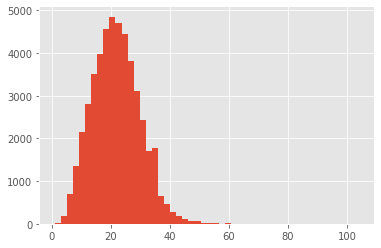

In [ ]:
sentences_len = [len(i) for i in sentences]
print(max(sentences_len))
plt.hist(sentences_len, bins=50);

## Preprocessing Data

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50
num_words = len(Vocab)

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(X, maxlen=max_len, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(y, maxlen=max_len, padding='post', value=tag2idx["O"])
y = [to_categorical(i, num_classes=len(tag2idx)) for i in y]

In [ ]:
X[0]

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    10,    16,     2,
          17,    18,    19,    20,    21,    22, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178], dtype=int32)

In [ ]:
y[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1)

## Model Training

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)

model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
! pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

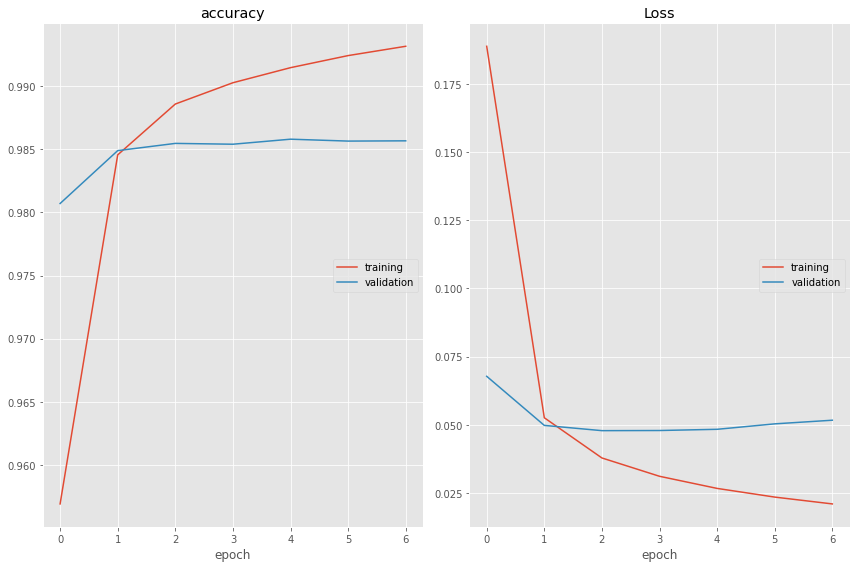

accuracy
	training         	 (min:    0.957, max:    0.993, cur:    0.993)
	validation       	 (min:    0.981, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.021, max:    0.189, cur:    0.021)
	validation       	 (min:    0.048, max:    0.068, cur:    0.052)


In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=0, mode='max')
callbacks = [early_stopping, PlotLossesCallback()]

history = model.fit(
        X_train,
        np.array(y_train),
        validation_split=0.2,
        batch_size=32,
        epochs=50,
        verbose=1,
        callbacks = callbacks
)

## Model Evaluation and testing

In [75]:
test_res = model.evaluate(X_test, np.array(y_test))

150/150 [==============================] - 4s 29ms/step - loss: 0.0526 - accuracy: 0.9856


In [78]:
print('Accuracy on test data: {:.3f} %'.format(test_res[1]*100))

Accuracy on test data: 98.559 %


In [82]:
idx = np.random.randint(0, X_test.shape[0])
y_hat = model.predict(np.array(X_test[idx]))
y_hat = np.argmax(y_hat, axis = -1)

y_true = np.argmax(np.array(y_test[idx]), axis=-1)

print("{:15}{:5}\t {}\n".format("Word", "True", "Predicted"))
print("-"*30)


for i in range(1, len(X_test[idx])):
    w = i; true = y_true[i]; pred = y_hat[i][0]
    print("{:15}{}\t {}".format(idx2word[w], idx2tag[true], idx2tag[pred]))

Word           True 	 Predicted

------------------------------
Thousands      B-org	 B-tim
of             I-org	 B-per
demonstrators  O	 O
have           O	 O
marched        O	 O
through        O	 O
London         O	 O
to             O	 O
protest        O	 O
the            O	 O
war            O	 O
in             O	 B-art
Iraq           B-per	 I-org
and            I-per	 B-gpe
demand         O	 O
withdrawal     O	 O
British        O	 O
troops         O	 O
from           O	 O
that           O	 O
country        O	 O
.              O	 O
Families       O	 O
soldiers       O	 O
killed         O	 O
conflict       O	 O
joined         O	 O
protesters     O	 O
who            O	 O
carried        O	 O
banners        O	 O
with           O	 O
such           O	 O
slogans        O	 O
as             O	 O
"              O	 O
Bush           O	 O
Number         O	 O
One            O	 O
Terrorist      O	 O
Stop           O	 O
Bombings       O	 O
They           O	 O
Houses         O	 O
Parliament     O	 O
